In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# from statannotations.Annotator import Annotator #https://github.com/trevismd/statannotations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# if getting OptionError: "No such keys(s): 'mode.use_inf_as_null'"
# !pip install --upgrade seaborn pandas

import matplotlib as mpl
import os
from glob import glob

from _load_data import * # Getting our specific labels, formatting, and data

# Getting some free samples
results_df.sample(3)

print(gens)

# Don't change any code below, it may break (probably will) --------------------

['../models/Vanilla.py', '../models/SimplifierBottomUp.py', '../models/SimplifierTopDown.py'] ['Without simplification', 'Simplifier Bottom Up', 'Simplifier Top Down']
(11, 14)
['Simplifier Bottom Up' 'Simplifier Top Down']
['Airfoil']
range(10, 250, 25)


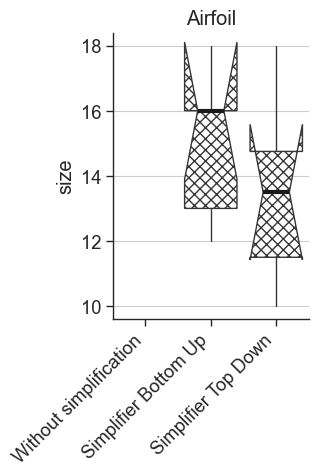

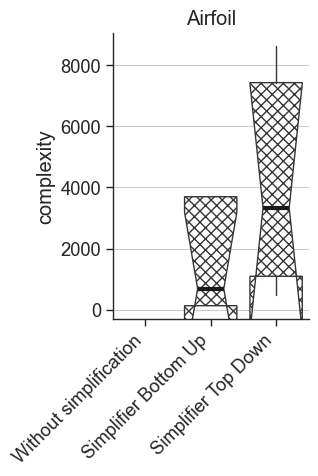

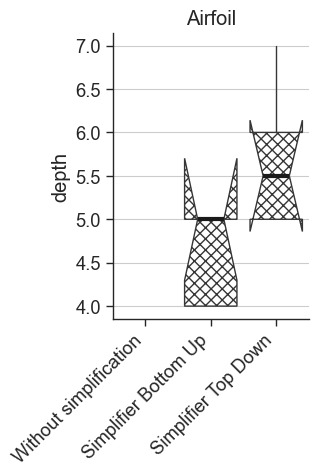

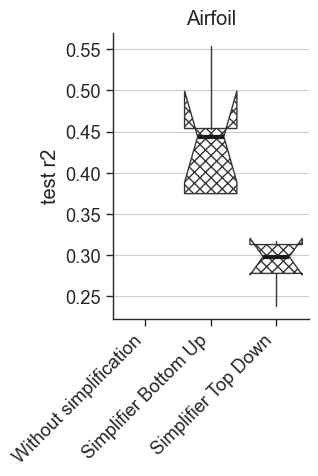

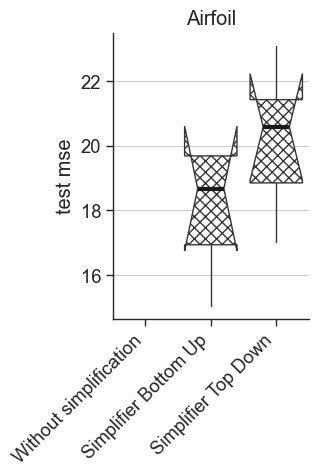

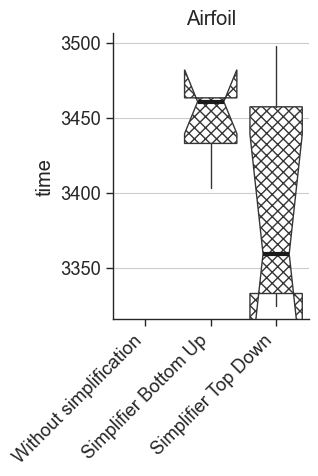

In [2]:
results_df['NSGA2'] = results_df['model'].apply(lambda model: "NSGA2" in model)
            
for yaxis in ['size', 'complexity', 'depth', 'test_r2', 'test_mse', 'time']:
    
    # Exploring boxplot results first
    g = sns.catplot(data=results_df, x='model', y=yaxis, hue='NSGA2',
        col='dataset', col_wrap=4, order=order, 
        **boxplot_kwargs, sharey=False, legend_out=False, aspect=0.5)

    # g.map_dataframe(sns.swarmplot, x="model", y=yaxis, 
    #                 palette=["#000000"], size=3,
    #                 alpha=0.5, dodge=True)

    g.set_titles("{col_name}").set_axis_labels("", yaxis.replace("_", " "))

    for (ds, plot_ax) in g._axes_dict.items():
        plot_ax.grid(which='major', axis='y', linewidth=.8)
        
        for tick in plot_ax.get_xticklabels():
            tick.set(rotation=45, ha="right")

        # All vs baseline
        pairs = [('Baseline', l)
                    for l in results_df[results_df['dataset']==ds]['model'].unique()
                    if l != 'Baseline']

        # Contextual vs non-NSGA2
        pairs = [
            ('Baseline', 'C-D-TS')
        ]

        if False:
            annotator = Annotator(
                plot_ax, pairs, data=results_df[(results_df['dataset']==ds)],
                x='model', y=yaxis,
                order=order)
            annotator.reset_configuration()
            annotator.configure(test="Mann-Whitney", hide_non_significant=True, #text_format='full',
                                comparisons_correction="holm", verbose=1, text_offset=-3)
            
            # Calculate and annotate
            annotator.apply_and_annotate()

    # Adding hatches -------------------------------------------------------------------
    # comment/uncomment block to add hatches. Make sure to uncomment hue when generating the plot
        hatches = ['///', 'xxx']
        # select the correct patches
        patches = [patch for patch in plot_ax.patches if type(patch) == mpl.patches.PathPatch]
        # the number of patches should be evenly divisible by the number of hatches
        h = hatches * (len(patches) // len(hatches))

        # iterate through the patches for each subplot
        for patch, model in zip(patches, order):
            if model != "Baseline":
                patch.set_hatch(hatches[0 if model.startswith("C-") else 1])
            
    # Fixing the legend to add the hatches
    for lp, hatch in zip(g.legend.get_patches(), hatches):
        lp.set_hatch(hatch)
        lp.set_facecolor('none')
    # ----------------------------------------------------------------------------------

    #g.set(yscale="log")

    g._legend.remove()
    plt.tight_layout()
    plt.savefig(f"../paper/figs/{yaxis}_boxplot.pdf")
    plt.savefig(f"../paper/figs/{yaxis}_boxplot.png")
    plt.show()  
    
    cd_df = results_df.copy()#.dropna() # (Just Island model sometimes gives an NAN)

    # Line below controls if we take the median or use each random seed as a different problem in CD
    # cd_df = cd_df.groupby(['model', 'dataset']).median().reset_index()
    

    # draw_cd_diagram(cd_df, alpha=0.05, path=f"../../paper/figs/{yaxis}_criticaldifferences.pdf")